# Data Analysis & Visualisation of 911 Calls

* Project Scope: Analyze and visualize 911 call data using python libraries
* Data source: [Kaggle](https://www.kaggle.com/mchirico/montcoalert) 

## 1. Import libraries

In [1]:
# Import Data Analysis libraries
import numpy as np
import pandas as pd

# Import Data Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For display in notebook
%matplotlib inline

## 2. Load data

In [ ]:
# Load 911 call data
df=pd.read_csv('911.csv')

## 3. Lets view data

In [2]:
df.info()
# df.dtypes - for just data types
# df.shape - for shape of the dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


This gives information about features and its datatypes. Also we now know that there are 99,492 911 calls records in this dataset 

In [3]:
# check for missing/ null data
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [ ]:
#visualize null values
sns.heatmap(df.isnull(),fmt="g", cmap='viridis')
plt.show()

We can notice about 13% zipcode column data is missing. This is quite a lot. Also we can see few twp and addr data is also missing. For now we will ignore it and analyze further

In [4]:
# Now lets looks at the data
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


Columns:
            * lat : String variable, Latitude
            * lng: String variable, Longitude
            * desc: String variable, Description of the Emergency Call
            * zip: String variable, Zipcode
            * title: String variable, Title
            * timeStamp: String variable, YYYY-MM-DD HH:MM:SS
            * twp: String variable, Township
            * addr: String variable, Address
            * e: String variable, Dummy variable (always 1)
            
Most of the columns data are self explanatory. we can see latitude(lat), longitude(lng), address(addr), its description(desc), township(twp), zipcode(zip), purpose of the call(title), data and time of the call(timeStamp) in this dataset. For better analysis, we can add additional features from columns 'title' and 'timeStamp'

## 4. Data Preprocessing - Step1
** Adding features **
* Adding two additional columns 'reason', 'reason_desc' from 'title' column
* Adding four additional columns 'hour','month','dayofWeek','date' from 'timeStamp' column

** Adding 'reason', 'reason_desc' featur **

In [5]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['reason_desc'] = df['title'].apply(lambda title: title.split(':')[1])

# lets loook at the data
df[['reason','reason_desc']].head(15)

,reason,reason_desc
0,EMS,BACK PAINS/INJURY
1,EMS,DIABETIC EMERGENCY
2,Fire,GAS-ODOR/LEAK
3,EMS,CARDIAC EMERGENCY
4,EMS,DIZZINESS
5,EMS,HEAD INJURY
6,EMS,NAUSEA/VOMITING
7,EMS,RESPIRATORY EMERGENCY
8,EMS,SYNCOPAL EPISODE
9,Traffic,VEHICLE ACCIDENT -


we can notice that for some values in the reason desc has hyphen at the end. Lets clean it up

In [118]:
# Function to remove hyphen at the end of 'reason_desc'
def remove_hyph(x):
    if x[-1] == '-':
        return x[:-2]
    else:
        return x
# now apply this function to the column
df['reason_desc'] = df['reason_desc'].apply(remove_hyph)

# also lets make sure to strip of any spaces in the new column
df['reason_desc'] = df['reason_desc'].map(lambda x: x.strip())

# lets again look at the data
df[['reason','reason_desc']].head(15)

,reason,reason_desc
0,EMS,BACK PAINS/INJURY
1,EMS,DIABETIC EMERGENCY
2,Fire,GAS-ODOR/LEAK
3,EMS,CARDIAC EMERGENCY
4,EMS,DIZZINESS
5,EMS,HEAD INJURY
6,EMS,NAUSEA/VOMITING
7,EMS,RESPIRATORY EMERGENCY
8,EMS,SYNCOPAL EPISODE
9,Traffic,VEHICLE ACCIDENT


we can now see data looks clean

** Adding time features **

In [7]:
# lets check the datatype of timeStamp column
type(df['timeStamp'].iloc[0])

str

Since type(df['timeStamp'].iloc[0]) is 'str', we will use pd.to_datetime to convert column from string to Date Time object

In [198]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [199]:
# now lets add new features 'hour','month','dayofWeek'
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['Date'] = df['timeStamp'].apply(lambda time: time.date())
df['dayofWeek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

since dayofWeek is an integer 0-6, we will map to actual string names with help of .map()

In [200]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['dayofWeek'] = df['dayofWeek'].map(dmap)

** DataFrame after adding features **

In [11]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,reason_desc,hour,month,Date,dayofWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,2015-12-10,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,2015-12-10,Thu


In [12]:
df.shape

(99492, 15)

we can see 5 new colums are added

## 5. Let's analyze and visualize data

** 1. Top 5 zipcodes for 911 calls **

In [13]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

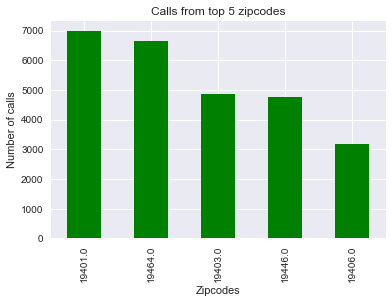

In [14]:
# lets visualize this
df['zip'].value_counts().head(5).plot.bar(color='green')
plt.xlabel('Zipcodes')
plt.ylabel('Number of calls')
plt.title('Calls from top 5 zipcodes')

** 2. Top 5 zipcodes with reason for 911 calls **

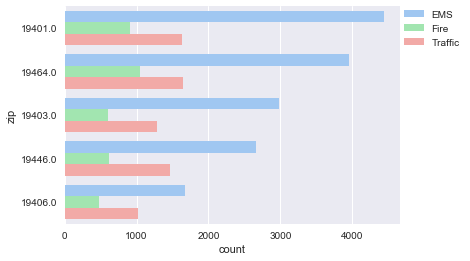

In [70]:
order = df['zip'].value_counts().head(5).sort_values(ascending=False).index
sns.countplot(y= 'zip', data=df, hue='reason', palette='pastel', order=order)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

** 3. Top 5 townships for 911 calls **

In [15]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

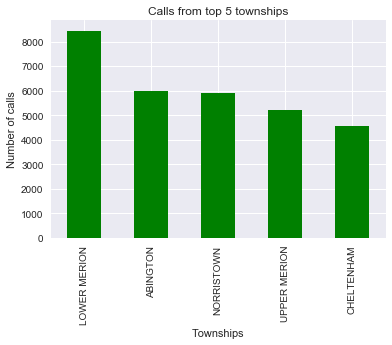

In [16]:
df['twp'].value_counts().head(5).plot.bar(color='green')
plt.xlabel('Townships')
plt.ylabel('Number of calls')
plt.title('Calls from top 5 townships')

** 4.Top 5 townships with reason for 911 calls **

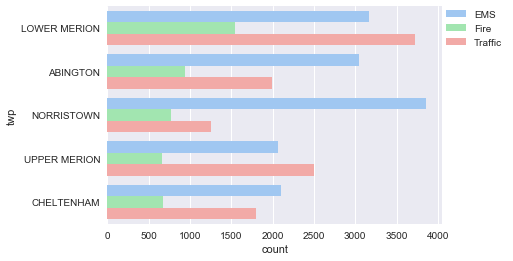

In [72]:
order = df['twp'].value_counts().head(5).sort_values(ascending=False).index
sns.countplot(y= 'twp', data=df, hue='reason', palette='pastel', order=order)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

Norristown got more EMS calls, while lower Merion got more traffic calls than any other county

** 5. Top 5 call purpose in Norristown township with call reason 'EMS' **

In [80]:
df[(df['twp'] == 'NORRISTOWN') & (df['reason'] == 'EMS')]['reason_desc'].value_counts().head(5)

 RESPIRATORY EMERGENCY        470
 CARDIAC EMERGENCY            347
 SUBJECT IN PAIN              342
 FALL VICTIM                  293
 UNKNOWN MEDICAL EMERGENCY    223
Name: reason_desc, dtype: int64

** 6.Comparing Norristown township 'EMS' calls with overall EMS data calls **

Since top 5 reason descriptions in Norriestwon are RESPIRATORY EMERGENCY,CARDIAC EMERGENCY, SUBJECT IN PAIN,FALL VICTIM,UNKNOWN MEDICAL EMERGENCY, we will compair same descritptions with all the data

In [129]:
# will create purpose list
purpose = ['RESPIRATORY EMERGENCY','CARDIAC EMERGENCY','SUBJECT IN PAIN','FALL VICTIM','UNKNOWN MEDICAL EMERGENCY']
# create list of respective 'EMS' reason description call counts for Norristown
NorristownEMS = df[(df['twp'] == 'NORRISTOWN') & (df['reason'] == 'EMS')]['reason_desc'].value_counts().head(5).values.tolist()
# create list of respective 'EMS' reason description call counts for all the data
allEMS= df[(df['reason'] == 'EMS') & (df['reason_desc'].isin (purpose))]['reason_desc'].value_counts().head(5).values.tolist()

In [130]:
# Now create dataFrame with the above lists
EMS_df = pd.DataFrame(
    {'purpose': purpose,
     'NoriestownEMS': NorristownEMS,
     'allEMS': allEMS})
EMS_df

,NoriestownEMS,allEMS,purpose
0,470,5112,RESPIRATORY EMERGENCY
1,347,5012,CARDIAC EMERGENCY
2,342,4863,SUBJECT IN PAIN
3,293,2687,FALL VICTIM
4,223,1873,UNKNOWN MEDICAL EMERGENCY


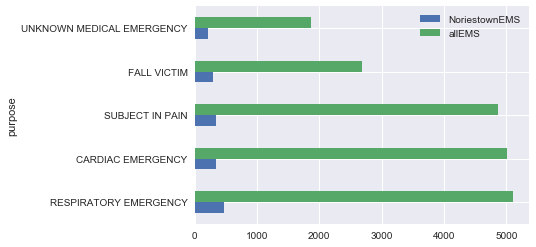

In [224]:
# Visualizing the comparison
EMS_df.plot(kind='barh', x='purpose')
plt.show()

** 7.Count based on reason **

In [18]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

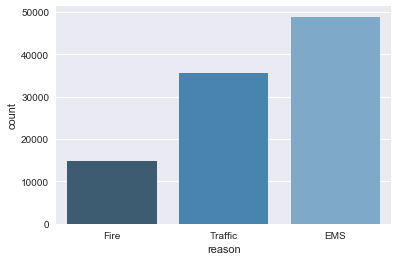

In [225]:
order = ['Fire','Traffic','EMS']
# best way to order is by using below 
#order = df['reason'].value_counts().sort_values(ascending=True).index
sns.countplot(x = 'reason', data=df,palette ='Blues_d', order=order)
# palette; 'GnBu_d', 'Greens_d, 

** 8.Count based on reason_desc **

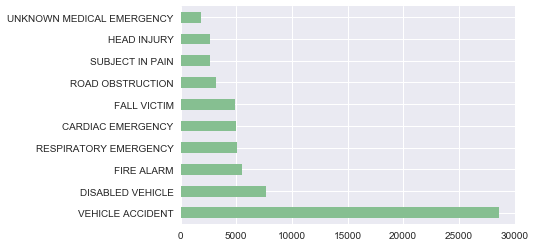

In [155]:
df['reason_desc'].value_counts().head(10).plot(kind='barh',color='#86bf91')

** 9.Calls based on day of the week and sorted by call reason **

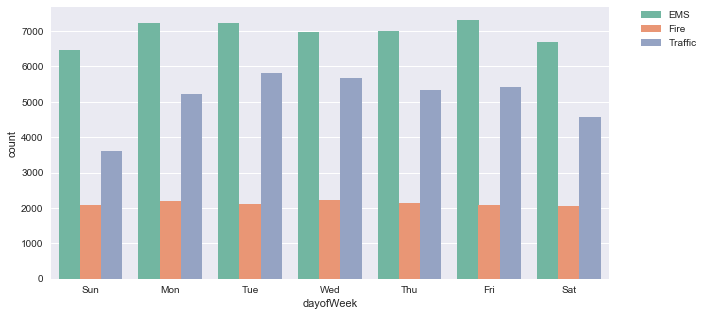

In [207]:
order_d = ['Sun','Mon', 'Tue', 'Wed','Thu','Fri','Sat']
plt.figure(figsize=(10,5))
sns.countplot('dayofWeek',data=df, hue='reason',palette='Set2', order=order_d)
#palette ='viridis', 'set2', 'pastel'

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

** 10.Calls based on month and sorted by call reason**

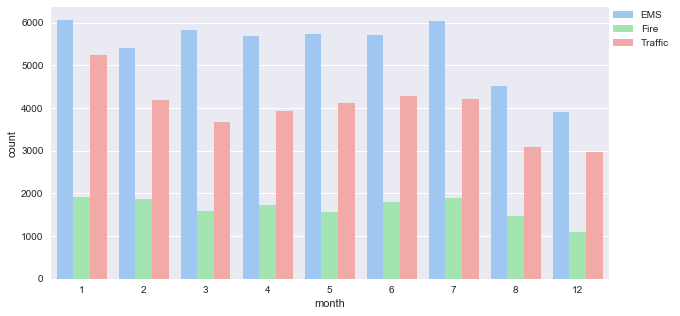

In [206]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',data=df,hue='reason',palette='pastel')

# To relocate the legend
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

** 11. Calls based on date **

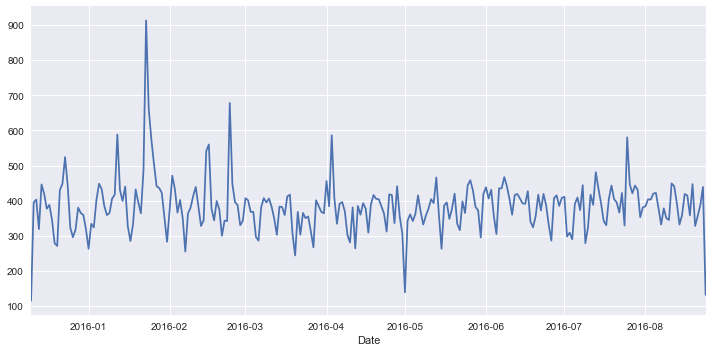

In [209]:
plt.figure(figsize=(10,5))
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

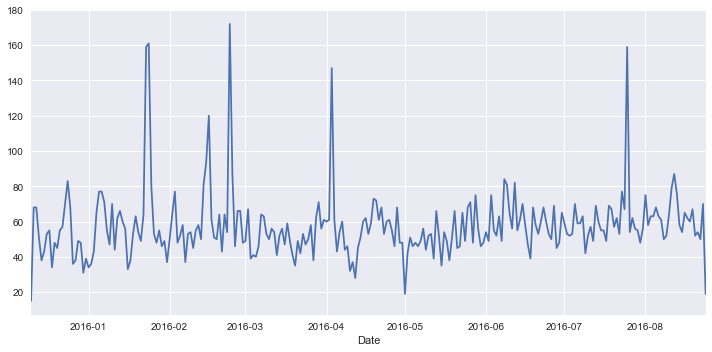

In [215]:
#we can analyze in detail by check specific reason 
plt.figure(figsize=(10,5))
df[df['reason'] =='Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout()

**11. Comparing calls between hour and day of the week **

In [218]:
dayHour = df.groupby(by=['dayofWeek','hour']).count()['reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


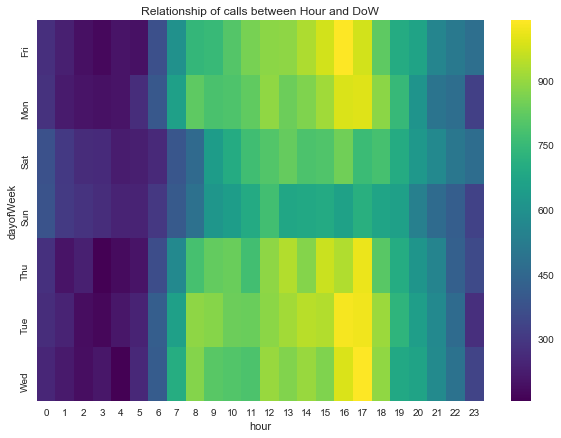

In [220]:
plt.figure(figsize=(10,7))
sns.heatmap(dayHour, cmap='viridis')
plt.title('Relationship of calls between Hour and DoW')

**12. Comparing calls between month and day of the week **

In [222]:
dayMonth = df.groupby(by=['dayofWeek','month']).count()['reason'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
dayofWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


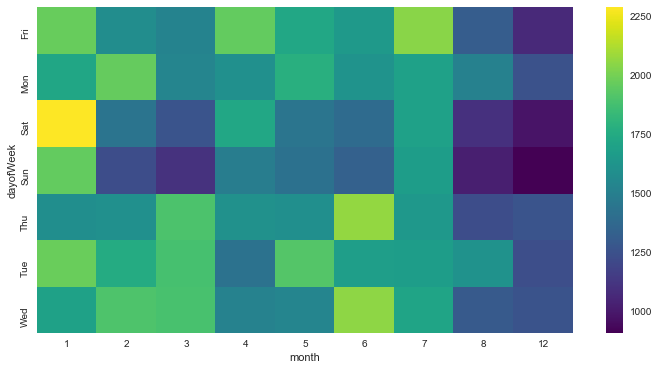

In [223]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

## Things to note after analysis

After analysing and visualizing data, hear are the things we know
* 13% zipcode column data is missing
* Top 5 zipcodes for 911 calls are 19401, 19464, 19403,19446, 19406
* Top 5 townships for 911 calls are LOWER MERION, ABINGTON, NORRISTOWN, UPPER MERION, CHELTENHAM
* About 50% of total calls are for EMS, traffic calls are 35% and rest are Fire related
* Out of all,  Vehicle accidents make up 30% calls. However this includes both EMS and traffic call reason description
* In calls by month plot, we can notice certain months are missing.either we need to fill missing information or discard the data
* Calls are unusually high in the month of January
* Based on calls data comparing day and hour, more calls tend to be made during the normal hours that people are awake.
* Call volums are high between 4pm-5pm from Monday through Friday (rush hour).
* Large number of calls are made on Saturdays in January